<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/keras_DNN_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"
df = pd.read_csv(dir + "bmi.csv")

In [3]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [4]:
# 몸무게와 키 데이터
df["weight"] /= 100   # normalization
df["height"] /= 200   # normalization
# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:2]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["label"]):
    y[i] = bclass[v]        # "thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

In [5]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  # 입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy'])  # 정확도 측정

In [6]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,     # 100개에 한 번씩 업데이터 실행
    epochs=50,          # 훈련 데이터셋을 총 60회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
        #validation data 분할 비율. 즉, 15000개 중에서 10%인 1500개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/50
120/120 [==============================] - 1s 3ms/step - loss: 1.0831 - accuracy: 0.3480 - val_loss: 1.0512 - val_accuracy: 0.3677
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 1.0357 - accuracy: 0.4361 - val_loss: 1.0084 - val_accuracy: 0.4027
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.9848 - accuracy: 0.5555 - val_loss: 0.9393 - val_accuracy: 0.6970
Epoch 4/50
120/120 [==============================] - 0s 1ms/step - loss: 0.9203 - accuracy: 0.6157 - val_loss: 0.8608 - val_accuracy: 0.7010
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.6346 - val_loss: 0.7763 - val_accuracy: 0.7513
Epoch 6/50
120/120 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.6671 - val_loss: 0.6926 - val_accuracy: 0.7937
Epoch 7/50
120/120 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.6962 - val_loss: 0.6175 - val_accuracy: 0.8487
Epoch 

In [7]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

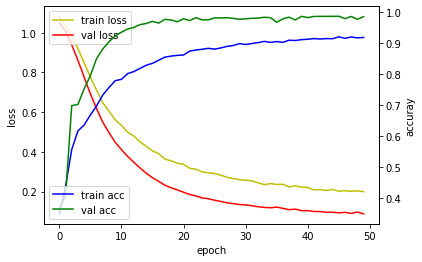

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [10]:
model.get_weights()

[array([[-0.5594141 ,  1.4539847 ,  0.03054525,  1.2492054 , -0.7272816 ,
          0.997361  , -0.47345978,  0.48332462],
        [ 0.8106979 , -0.99871963,  0.61378527, -0.8162806 ,  0.62702614,
         -0.5494378 , -0.57865435, -0.83510125]], dtype=float32),
 array([ 0.10541144, -0.48314548, -0.27718073, -0.44617546,  0.31154075,
        -0.40074837,  0.        , -0.19153585], dtype=float32),
 array([[ 2.5060794 , -0.01572591,  0.6043045 , -0.31668383],
        [-1.4279535 ,  3.7185392 , -3.4882393 ,  2.8187256 ],
        [ 0.60807204,  0.31213567,  0.14423119, -0.03158639],
        [-1.6780987 ,  3.4885926 , -4.04024   ,  3.9925325 ],
        [ 5.1165166 , -0.62483156,  0.28621563, -0.7626806 ],
        [-0.8851996 ,  2.4013379 , -2.7304265 ,  2.950683  ],
        [-0.45996794, -0.40273875, -0.16223365,  0.4050489 ],
        [-0.2812592 , -0.14190918,  0.45973814,  0.21256992]],
       dtype=float32),
 array([0.6704536 , 0.02393303, 0.2520721 , 0.13775918], dtype=float32),
 array(

In [11]:
model.save(dir+"dnn_bmi.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model(dir+"dnn_bmi.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [12]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

[[1.50978656e-06 2.34268866e-02 9.76571679e-01]
 [8.90987277e-01 1.09012745e-01 1.14495202e-11]
 [7.04640569e-03 9.92942810e-01 1.07270744e-05]
 ...
 [9.97091532e-01 2.90843123e-03 1.19152371e-24]
 [9.87170875e-01 1.28291482e-02 1.91148243e-19]
 [1.20452431e-04 7.77592659e-01 2.22286955e-01]]


array([2, 0, 1, ..., 0, 0, 1])

In [13]:
# 새로운 샘플의 클래스 예측하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.8, 0.875]
[[1.1703223e-09 4.4817296e-03 9.9551827e-01]] 2


In [14]:
type(X_test)

pandas.core.frame.DataFrame

In [15]:
X_test.head()

,height,weight
15000,0.690,0.55
15001,0.760,0.36
15002,0.915,0.72
15003,0.990,0.51
15004,0.745,0.47


In [16]:
X_test.head(5).index.tolist()

[15000, 15001, 15002, 15003, 15004]

In [17]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

height    0.69
weight    0.55
Name: 15000, dtype: float64

[[1.5097866e-06 2.3426887e-02 9.7657168e-01]] 2


In [18]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [19]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

[0.7999703333333333, 0.5757626666666668]	[[7.6466603e-03 9.9216324e-01 1.9020442e-04]]	1
[0.6, 0.35]	[[0.00149215 0.681535   0.3169729 ]]	1
[1.0, 0.8]	[[2.56422497e-02 9.74357605e-01 1.00962424e-07]]	1
[0.6, 0.8]	[[4.7637835e-11 2.4923421e-03 9.9750757e-01]]	2
[1.0, 0.35]	[[9.9881661e-01 1.1834557e-03 8.5958115e-28]]	0
